NEED TO ADDRESS SKI

In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
import gt_apps as gt
import os
import sys
import re
import mkLightCurve
import glob
from make4FGLxml import *

This is make4FGLxml version 01r05.
The default diffuse model files and names are for pass 8 and 4FGL and assume you have v11r5p3 of the Fermi Science Tools or higher.


In [ ]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")

#!ls *_PH* > photons.txt

def generatemodel(name,templateDir):
    
    gt.filter['evclass'] = 128
    gt.filter['evtype'] = 3
    gt.filter['rad'] = 20
    gt.filter['zmax'] = 90
    gt.filter['emin'] = 100
    gt.filter['emax'] = 500000
    gt.filter['infile'] = '@photons.txt'
    gt.filter['outfile'] = name+'_allphotons_filtered.fits'
    gt.filter.run()
    
    gt.maketime['scfile'] = 'spacecraft.fits'
    gt.maketime['filter'] = '(DATA_QUAL>0)&&(LAT_CONFIG==1)'
    gt.maketime['roicut'] = 'no'
    gt.maketime['evfile'] = name+'_allphotons_filtered.fits'
    gt.maketime['outfile'] = name+'_allphotons_gti.fits'
    gt.maketime.run()


    mymodel = srcList('gll_psc_v21.xml',name+'_allphotons_gti.fits',name+'_model.xml')
    mymodel.makeModel('gll_iem_v07.fits','gll_iem_v07','iso_P8R3_SOURCE_V2_v1.txt','iso_P8R3_SOURCE_V2_v1',normsOnly=True,radLim=5,
                 extDir=templateDir)

    with open(name+'_model_clean.xml', 'wt') as f:
        f.write(re.sub(r'\$\(LATEXTDIR\)/', 
                       '', 
                       open(name+'_model.xml').read()))

    return;

In [ ]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")

model_name = '4FGL J1228.0-4853'
name = 'J12270'            #define parameters specific to source
xcoord = 186.995
ycoord = -48.8952
binsz = 4000000 #size of bins wanted
start = 239557417 #start of fermi mission
end = 607305605 #final time for data downloaded
diff = end - start #time of fermi mission
numbins = diff/binsz #number of bins
poolsize = 15

i = list(range(1,numbins+1))

mkLightCurve.generateflux(poolsize,name,model_name,xcoord,ycoord,start,binsz,i)

time -p gtselect infile=@photons.txt outfile=J12270_filtered-337557417-4000000.fits ra="INDEF" dec="INDEF" rad=20.0 tmin=335557417.0 tmax=339557417.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
time -p gtselect infile=@photons.txt outfile=J12270_filtered-249557417-4000000.fits ra="INDEF" dec="INDEF" rad=20.0 tmin=247557417.0 tmax=251557417.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
time -p gtselect infile=@photons.txt outfile=J12270_filtered-329557417-4000000.fits ra="INDEF" dec="INDEF" rad=20.0 tmin=327557417.0 tmax=331557417.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
time -p gtselect infile=@photons.txt outfile=J

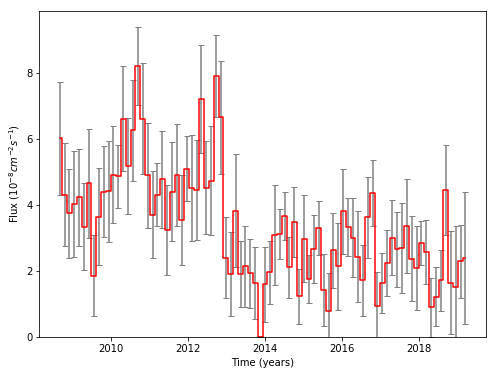

In [2]:
os.chdir("/home/b7009348/projects/fermi-data/XSS_J12270_Data")
name = 'J12270'
mkLightCurve.plotcurve(name,4000000)